<a href="https://colab.research.google.com/github/BrianThomasRoss/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Brian_Ross_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, ttest_1samp

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

df = df.replace({'?': np.NaN, 'y':1, 'n':0})

rep = df[df.party == 'republican']

dem = df[df.party == 'democrat']

--2019-10-09 00:07:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-10-09 00:07:00 (593 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
print(rep.shape)
print(dem.shape)

(168, 17)
(267, 17)


### Generate and numerically represent a confidence interval

In [0]:
from scipy import stats

## Confidence interval function

def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  margin = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean, mean - margin, mean + margin)

In [5]:
### Hypothesis test

### null hypothesis - no democrats support a physician fee freeze

ttest_1samp(dem['water-project'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=15.49193338482967, pvalue=6.633846650320544e-38)

In [11]:
confidence_interval(dem['water-project'].dropna())

(0.502092050209205, 0.43824514095228484, 0.5659389594661252)

In [0]:
# Define a function to return a DataFrame from a list of tuples for samples of a df subset

def twenty_sample_ci(subset):
  """
  Produce a box plot showing the confidence intervals against the mean of the 
  total population using the UCI house-votes-84 data 
  from: https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

  Arguments: DataFrame subset i.e. dem['water-project']

  Returns: Boxplot
  """
  index = 0 # Initialize index
  sample_list = [] # Initialize list of samples
  true_mean = confidence_interval(subset.dropna())[0] # mean of total population

  #looping to create a list of tuples containing confidence_interval() returns
  for i in range(20):
    sample_list.append(confidence_interval(subset.sample(20).dropna()))
    index += 1

  # Creating a DataFrame from the sample list  
  twenty_sample_df = pd.DataFrame(sample_list, columns=['mean',
                                                        'lower_bound',
                                                        'upper bound'])
  twenty_sample_df = twenty_sample_df.reset_index()

  twenty_sample_df = twenty_sample_df.pivot_table(columns='index')

  # plotting the values of the sample list on a box plot
  bplot = twenty_sample_df.plot.box()
  # plots a horizontal line at the location of the population mean
  plt.axhline(y=true_mean, linewidth=2, linestyle="-")

  return bplot


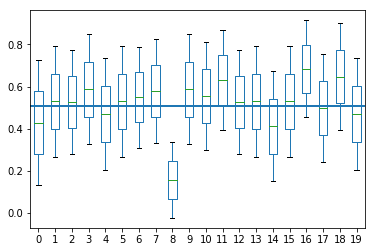

In [120]:
twenty_sample_ci(rep['water-project']);

In [110]:
true_mean = confidence_interval(dem['water-project'].dropna())[0]
true_mean

0.502092050209205

### Graphically represent a confidence interval

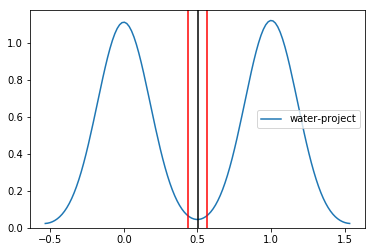

In [126]:
import seaborn as sns
water_project = dem['water-project'].dropna()
sns.kdeplot(water_project)
CI = confidence_interval(water_project)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

In [0]:
confidence_interval(dem['water-project'].dropna())

(0.502092050209205, 0.43824514095228484, 0.5659389594661252)

**Interpret the confidence interval - what does it tell you about the data and its distribution?**

The confidence interval shows that mean was within the ranges of the data that we would expect to find 95% of the time. More generally this means that if we repeated the sampling 20 times, then 19 out of 20 times we could expect the CI to contain the mean of the population. The confidence interval does not provide any insight into the data moreso it provides 

### Chi-Squared Tests

Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

#### Using Numpy

In [127]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-10-09 03:39:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  16.7MB/s    in 0.2s    

2019-10-09 03:39:30 (16.7 MB/s) - ‘adult.data’ saved [3974305/3974305]



In [175]:
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']

adult_df = pd.read_csv('adult.data', names=column_headers)

adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [169]:
# Make a crosstab of two categorical variables
adult_ctab = pd.crosstab(adult_df['sex'], adult_df['education'], margins=True)
adult_ctab

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
sex,,,,,,,,,,,,,,,,,
Female,295,432,144,46,84,160,144,421,500,1619,86,3390,536,16,92,2806,10771
Male,638,743,289,122,249,486,370,646,882,3736,327,7111,1187,35,484,4485,21790
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


In [141]:
female_count = adult_ctab.iloc[0][0:15].values
female_count

array([ 295,  432,  144,   46,   84,  160,  144,  421,  500, 1619,   86,
       3390,  536,   16,   92])

In [142]:
male_count = adult_ctab.iloc[1][0:15].values
male_count

array([ 638,  743,  289,  122,  249,  486,  370,  646,  882, 3736,  327,
       7111, 1187,   35,  484])

In [172]:
row_sums = adult_ctab.iloc[0:2, 16].values
col_sums = adult_ctab.iloc[2, 0:16].values

print(row_sums)
print(col_sums)

[10771 21790]
[  933  1175   433   168   333   646   514  1067  1382  5355   413 10501
  1723    51   576  7291]


In [174]:
total = adult_ctab.loc['All', 'All']
total

32561

In [176]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 16)
[[ 308.63127668  388.6835478   143.2340223    55.57347747  110.15457142
   213.69325266  170.02837751  352.95774086  457.15801112 1771.40459445
   136.61813212 3473.67313657  569.95893861   16.87051995  190.53763705
  2411.82276343]
 [ 624.36872332  786.3164522   289.7659777   112.42652253  222.84542858
   432.30674734  343.97162249  714.04225914  924.84198888 3583.59540555
   276.38186788 7027.32686343 1153.04106139   34.12948005  385.46236295
  4879.17723657]]


In [178]:
observed = pd.crosstab(adult_df['sex'], adult_df['education']).values
print(observed.shape)
observed

(2, 16)


array([[ 295,  432,  144,   46,   84,  160,  144,  421,  500, 1619,   86,
        3390,  536,   16,   92, 2806],
       [ 638,  743,  289,  122,  249,  486,  370,  646,  882, 3736,  327,
        7111, 1187,   35,  484, 4485]])

In [179]:
chi_squared = ((observed - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 297.71500372503687


In [180]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}") 

Degrees of Freedom: 15


#### Using SciPy

In [181]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 297.71500372503687
P-value: 1.667778440920507e-54
Degrees of Freedom: 15
Expected: 
 [[ 308.63127668  388.6835478   143.2340223    55.57347747  110.15457142
   213.69325266  170.02837751  352.95774086  457.15801112 1771.40459445
   136.61813212 3473.67313657  569.95893861   16.87051995  190.53763705
  2411.82276343]
 [ 624.36872332  786.3164522   289.7659777   112.42652253  222.84542858
   432.30674734  343.97162249  714.04225914  924.84198888 3583.59540555
   276.38186788 7027.32686343 1153.04106139   34.12948005  385.46236295
  4879.17723657]]


# Low chi-squared value and high p value mean there is a significant correlation between sex and education level

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)